# Implementing the Gradient Descent Algorithm

In this lab, we'll implement the basic functions of the Gradient Descent algorithm to find the boundary in a small dataset. First, we'll start with some functions that will help us plot and visualize the data.

In [89]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines
def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s=25, c='red', edgecolors='k')
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s=25, c='blue', edgecolors='k')

def display(m,b, color='g--'):
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

## Reading and plotting the data

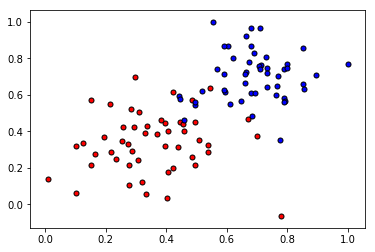

In [90]:
data = pd.read_csv('data.csv', header=None)
# data.head()
# data.shape
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

In [103]:
# data.describe()

## TODO: Implementing the basic functions
Here is your turn to shine. Implement the following formulas, as explained in the text.
- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \longrightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \longrightarrow b + \alpha (y - \hat{y})$$

In [104]:
np.exp(-1)

0.36787944117144233

In [114]:
# # Activation (sigmoid) function
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def output_formula(features, weights, bias):
#     return sigmoid(np.dot(features, weights) + bias)

# def error_formula(y, output):
#     return - y*np.log(output) - (1 - y) * np.log(1-output)

# def update_weights(x, y, weights, bias, learnrate):
#     output = output_formula(x, weights, bias)
#     d_error = -(y - output)
#     weights -= learnrate * d_error * x
#     bias -= learnrate * d_error
#     return weights, bias

In [115]:
# Implement the following functions

# Activation (sigmoid) function
def sigmoid(x):
    return (1/(1+np.exp(-x)))

# Output (prediction) formula
def output_formula(features, weights, bias):
    return sigmoid(np.matmul(features, weights)+bias)

# Error (log-loss) formula
def error_formula(y, output):
    return ((-y * np.log(output)) - (1-y) * np.log(1-output))

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    output = output_formula(x, weights, bias)
    alpha = learnrate * (y-output)
    weights2 = weights + alpha * x
    bias2 = bias + alpha
    return weights2, bias2

## Training function
This function will help us iterate the gradient descent algorithm through all the data, for a number of epochs. It will also plot the data, and some of the boundary lines obtained as we run the algorithm.

In [193]:
# np.random.seed(44)

# epochs = 100
# learnrate = 0.01

# def train(features, targets, epochs, learnrate, graph_lines=False):
    
#     errors = []
#     n_records, n_features = features.shape
#     last_loss = None
#     weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
#     bias = 0
#     for e in range(epochs):
#         del_w = np.zeros(weights.shape)
#         for x, y in zip(features, targets):
#             output = output_formula(x, weights, bias)
#             error = error_formula(y, output)
#             weights, bias = update_weights(x, y, weights, bias, learnrate)
        
#         # Printing out the log-loss error on the training set
#         out = output_formula(features, weights, bias)
#         loss = np.mean(error_formula(targets, out))
#         errors.append(loss)
#         if e % (epochs / 10) == 0:
#             print("\n========== Epoch", e,"==========")
#             if last_loss and last_loss < loss:
#                 print("Train loss: ", loss, "  WARNING - Loss Increasing")
#             else:
#                 print("Train loss: ", loss)
#             last_loss = loss
#             predictions = out > 0.5
#             accuracy = np.mean(predictions == targets)
#             print("Accuracy: ", accuracy)
#         if graph_lines and e % (epochs / 100) == 0:
#             display(-weights[0]/weights[1], -bias/weights[1])
            

#     # Plotting the solution boundary
#     plt.title("Solution boundary")
#     display(-weights[0]/weights[1], -bias/weights[1], 'black')

#     # Plotting the data
#     plot_points(features, targets)
#     plt.show()

#     # Plotting the error
#     plt.title("Error Plot")
#     plt.xlabel('Number of epochs')
#     plt.ylabel('Error')
#     plt.plot(errors)
#     plt.show()

In [250]:
np.random.seed(44)
epochs = 100
learnrate = 0.1

def train(features, targets, epochs, learnrate, graph_lines=False):
    errors = []
    accuracies = []
    last_loss = None
    # print(features.shape)
    # features.shape = (100,2)
    n_records, n_features = features.shape
    # print(n_records, n_features)
    # n_records = 100
    # n_features = 2
    weights = np.random.normal(scale=1/n_features**.5, size=n_features)
    # print(weights)
    # print(weights.shape)
    # weights eg. [ 1.31435855  0.06193405]
    # weights.shape = (2,)
    # print(targets.shape)
    # targets.shape = (100,)
    bias = 0
    for e in range(epochs):
        # This is the main step that does the step 2 of GD algo, that is
        # calculating w' and b' for each point(x) and updating the formula. 
        # The next step merely calculates the error
        for x,y in zip(features, targets):
            # print(x,y)
            # print(x.shape)
            # print(y.shape)
            # print(y)
            # x.shape = (2,)
            # y is a scalar -> 0 or 1
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
            # print(output)
            # print(error)
            # print(weights.shape)
            # print(bias)
            # output is a number, error is a number, weight.shape = (2,0), bias is a number
        
        # this step just calculates the cumulative error. Does not update any weights 
        # to adjust the error
        out = output_formula(features, weights, bias)
        # print(out.shape)
        # print(out)
        # out.shape = (100,)
        err = error_formula(targets, out)
        loss = np.mean(err)
        # print(loss)
        errors.append(loss)
        
        if e % (epochs/10) == 0:
            print("================ Epoch e = ", e, "================")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "WARNING")
            else:
                print("train loss: ",loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions==targets)
            print("Accuracy: ", accuracy)
            accuracies.append(accuracy)
            if graph_lines:
                display(-weights[0]/weights[1], -bias/weights[1])
        
    plt.title("Solution Boundary")
    # display(m, b, color='g--')
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    plot_points(features, targets)
    plt.show()
    
    plt.title('Error Plot')
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

    plt.title('Accuracy Plot')
    plt.xlabel('Number of epochs /10')
    plt.ylabel('Error')
    plt.plot(accuracies)


## Time to train the algorithm!
When we run the function, we'll obtain the following:
- 10 updates with the current training loss and accuracy
- A plot of the data and some of the boundary lines obtained. The final one is in black. Notice how the lines get closer and closer to the best fit, as we go through more epochs.
- A plot of the error function. Notice how it decreases as we go through more epochs.

================ Epoch e =  0 ================
train loss:  0.843982618777
Accuracy:  0.5
================ Epoch e =  10 ================
train loss:  0.392597719231
Accuracy:  0.82
================ Epoch e =  20 ================
train loss:  0.277937980383
Accuracy:  0.91
================ Epoch e =  30 ================
train loss:  0.231877306589
Accuracy:  0.92
================ Epoch e =  40 ================
train loss:  0.207426700177
Accuracy:  0.93
================ Epoch e =  50 ================
train loss:  0.192330472133
Accuracy:  0.93
================ Epoch e =  60 ================
train loss:  0.182106924888
Accuracy:  0.93
================ Epoch e =  70 ================
train loss:  0.174740853421
Accuracy:  0.93
================ Epoch e =  80 ================
train loss:  0.169193407963
Accuracy:  0.93
================ Epoch e =  90 ================
train loss:  0.164874717633
Accuracy:  0.93


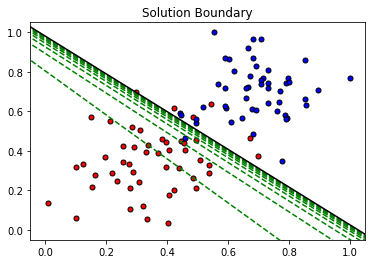

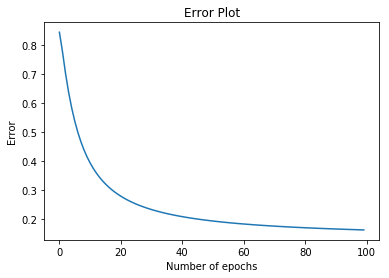

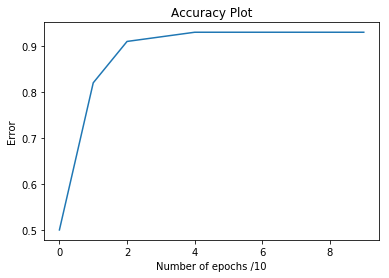

In [251]:
train(X, y, epochs, learnrate, True)